In [26]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from ydata_profiling import ProfileReport
from sklearn.metrics import (confusion_matrix, classification_report, roc_curve, auc, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, precision_recall_curve, average_precision_score)
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from mlxtend.plotting import plot_decision_regions
from sklearn.metrics import accuracy_score
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import GridSearchCV
from scipy.stats import chi2_contingency

In [25]:
df = pd.read_csv('train.csv')
df = df.drop('id', axis = 1)

In [26]:
df.shape

(11504798, 11)

In [4]:
df.head(10000)

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,Male,21,1,35.0,0,1-2 Year,Yes,65101.0,124.0,187,0
1,Male,43,1,28.0,0,> 2 Years,Yes,58911.0,26.0,288,1
2,Female,25,1,14.0,1,< 1 Year,No,38043.0,152.0,254,0
3,Female,35,1,1.0,0,1-2 Year,Yes,2630.0,156.0,76,0
4,Female,36,1,15.0,1,1-2 Year,No,31951.0,152.0,294,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,Male,28,1,13.0,0,< 1 Year,Yes,17666.0,160.0,238,0
9996,Male,24,1,15.0,0,< 1 Year,No,33699.0,152.0,131,0
9997,Male,51,1,28.0,0,1-2 Year,Yes,27330.0,26.0,251,1
9998,Female,22,1,47.0,0,< 1 Year,Yes,35186.0,152.0,275,0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11504798 entries, 0 to 11504797
Data columns (total 11 columns):
 #   Column                Dtype  
---  ------                -----  
 0   Gender                object 
 1   Age                   int64  
 2   Driving_License       int64  
 3   Region_Code           float64
 4   Previously_Insured    int64  
 5   Vehicle_Age           object 
 6   Vehicle_Damage        object 
 7   Annual_Premium        float64
 8   Policy_Sales_Channel  float64
 9   Vintage               int64  
 10  Response              int64  
dtypes: float64(3), int64(5), object(3)
memory usage: 965.5+ MB


In [9]:
df.describe()

,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,1.150480e+07,1.150480e+07,1.150480e+07,1.150480e+07,1.150480e+07,1.150480e+07,1.150480e+07,1.150480e+07
mean,3.838356e+01,9.980220e-01,2.641869e+01,4.629966e-01,3.046137e+04,1.124254e+02,1.638977e+02,1.229973e-01
std,1.499346e+01,4.443120e-02,1.299159e+01,4.986289e-01,1.645475e+04,5.403571e+01,7.997953e+01,3.284341e-01
min,2.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,2.630000e+03,1.000000e+00,1.000000e+01,0.000000e+00
25%,2.400000e+01,1.000000e+00,1.500000e+01,0.000000e+00,2.527700e+04,2.900000e+01,9.900000e+01,0.000000e+00
50%,3.600000e+01,1.000000e+00,2.800000e+01,0.000000e+00,3.182400e+04,1.510000e+02,1.660000e+02,0.000000e+00
75%,4.900000e+01,1.000000e+00,3.500000e+01,1.000000e+00,3.945100e+04,1.520000e+02,2.320000e+02,0.000000e+00
max,8.500000e+01,1.000000e+00,5.200000e+01,1.000000e+00,5.401650e+05,1.630000e+02,2.990000e+02,1.000000e+00


In [10]:
df.isnull().sum()

Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

In [11]:
df['Region_Code'] = df['Region_Code'].astype(int)
df['Policy_Sales_Channel'] = df['Policy_Sales_Channel'].astype(int)
df['Annual_Premium'] = df['Annual_Premium'].astype(int)

In [12]:
df.duplicated().sum()

0

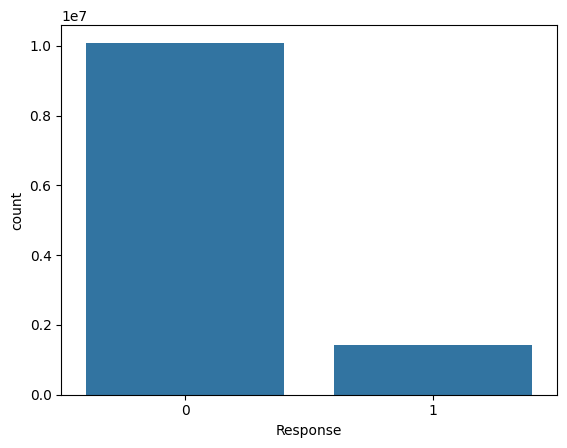

In [13]:
sns.countplot(x='Response', data=df)
plt.show()

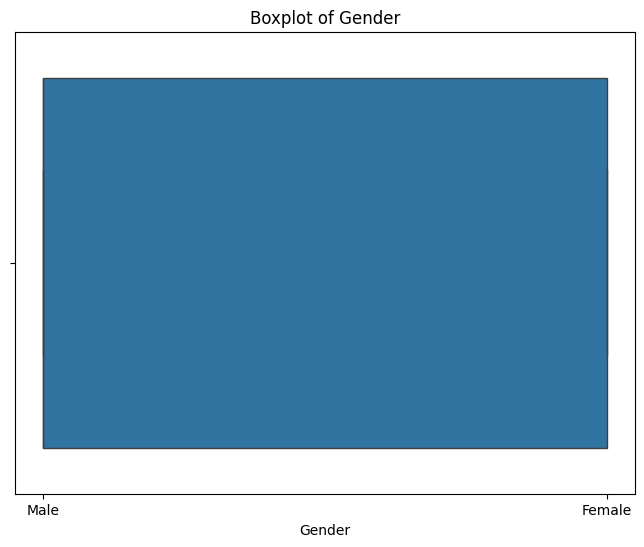

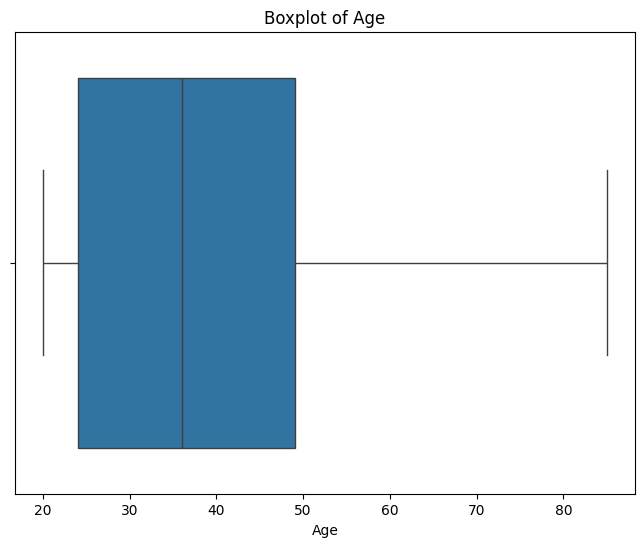

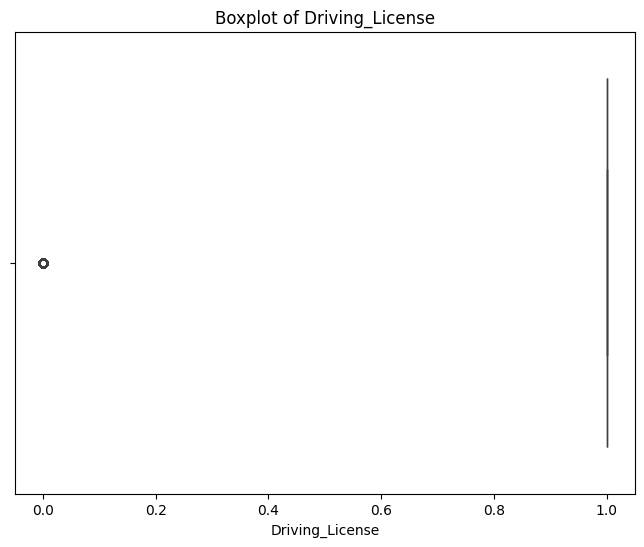

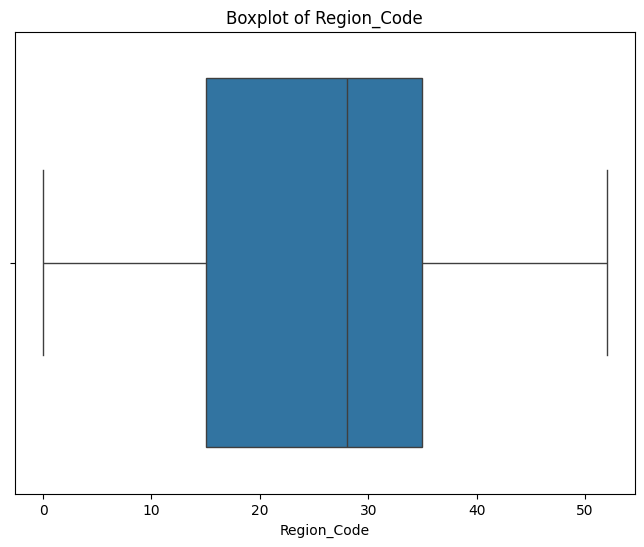

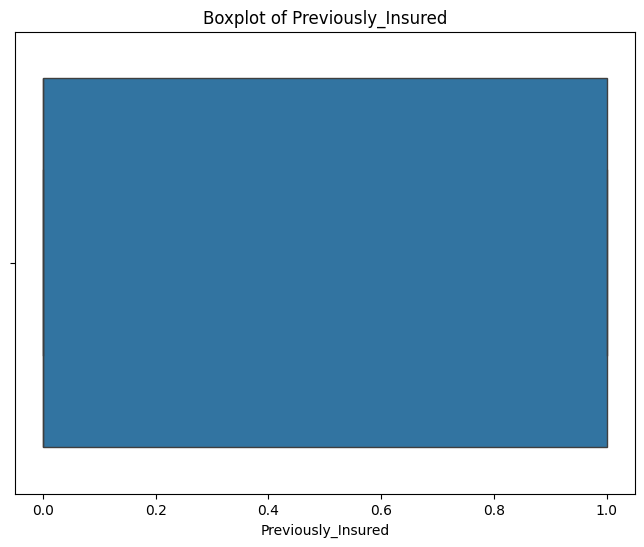

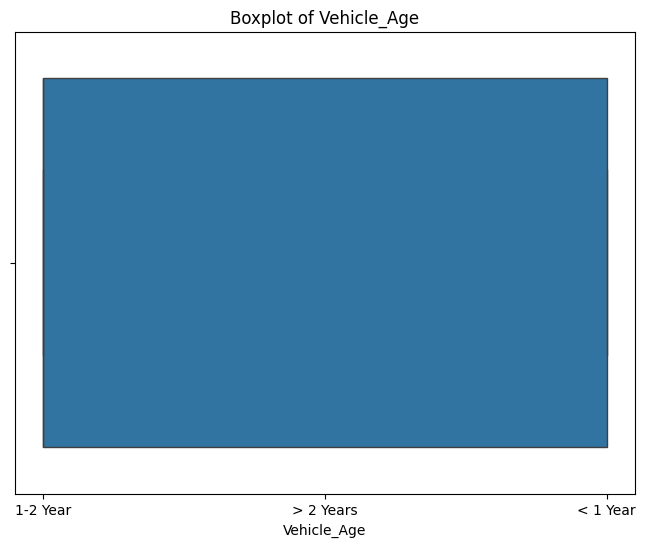

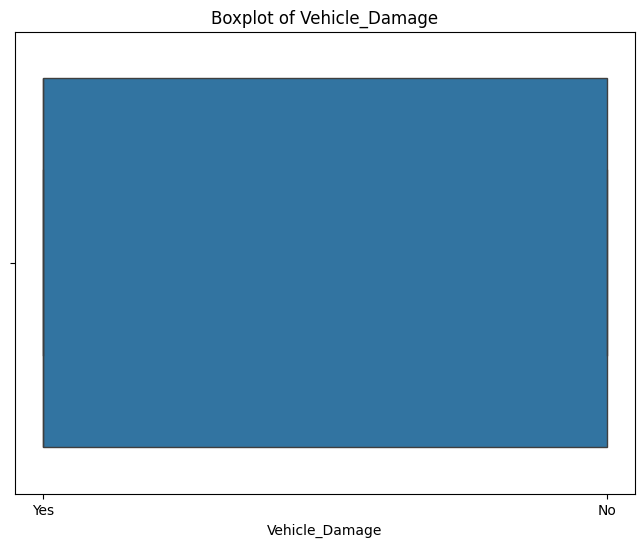

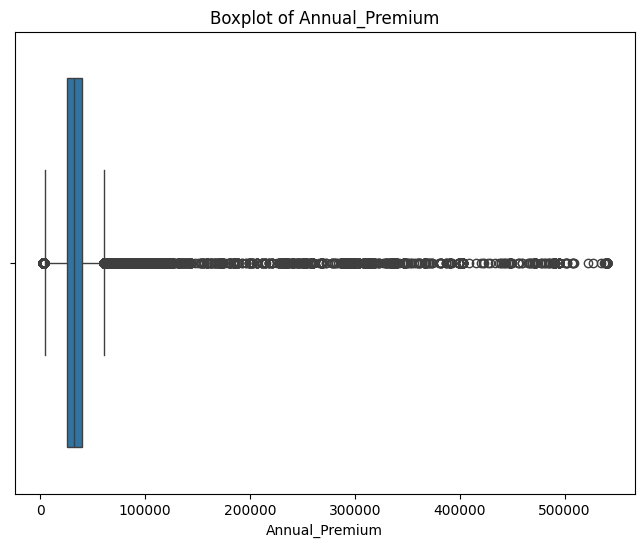

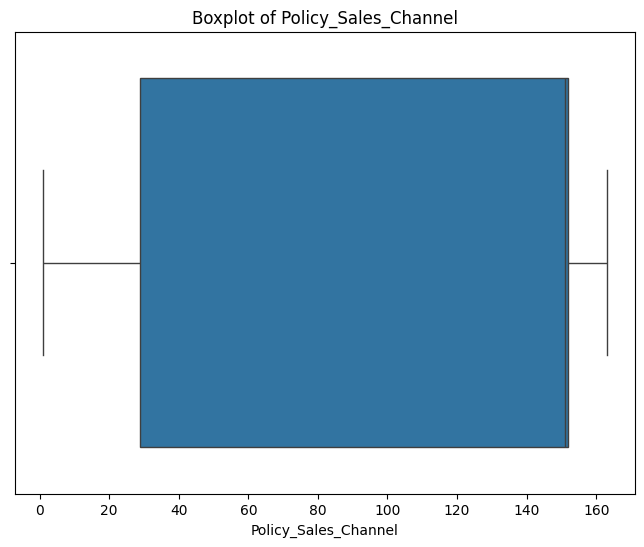

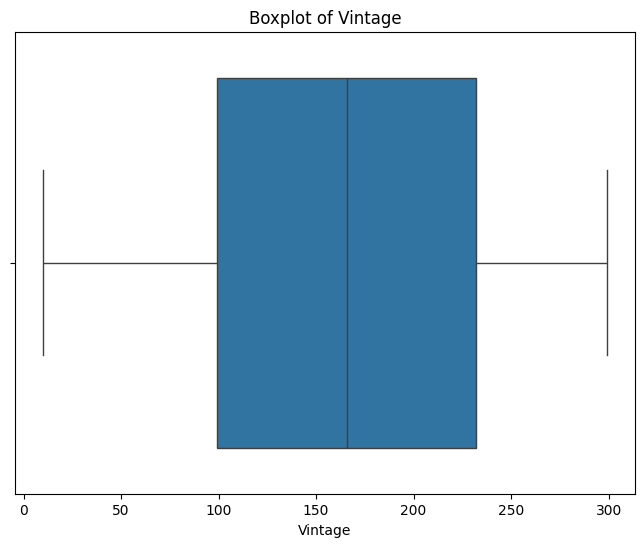

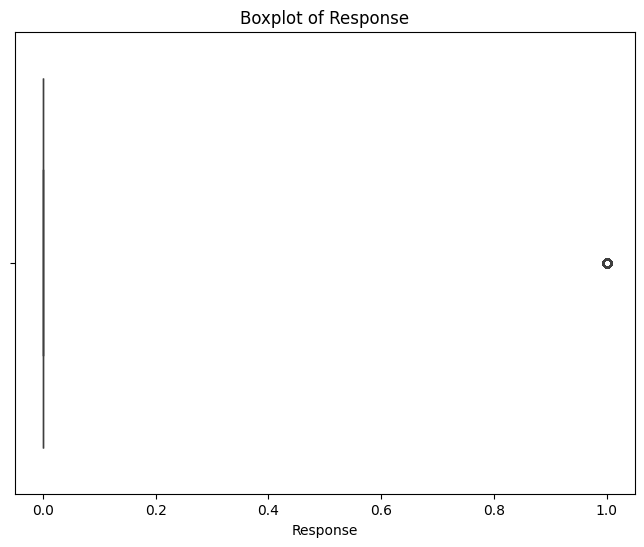

In [44]:
for col in df.columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.xlabel(col)
    plt.show()

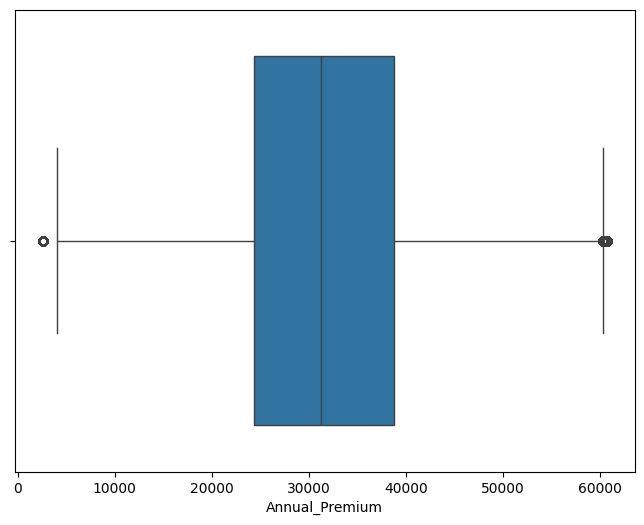

In [14]:
def remove_outliers_iqr(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[col] = np.where((df[col] < lower_bound) | (df[col] > upper_bound), df[col].mode(), df[col])
    return df

for i in range (0,1):
    df = remove_outliers_iqr(df, 'Annual_Premium')
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['Annual_Premium'])
# plt.title(f'Boxplot of {'Annual_Premium'} without outliers')
plt.xlabel('Annual_Premium')
plt.show()

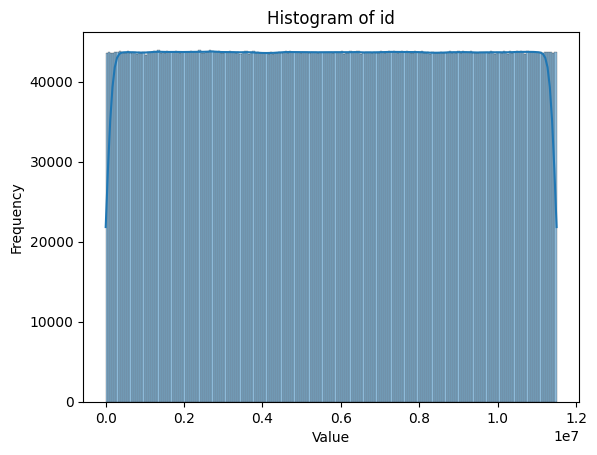

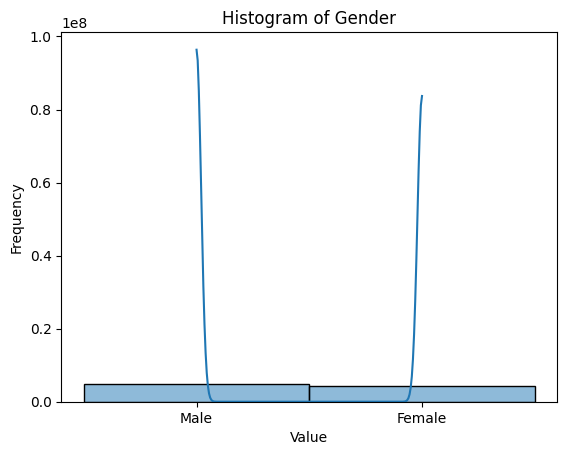

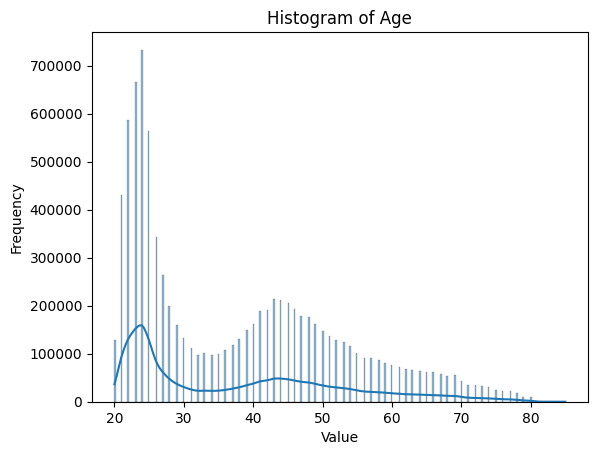

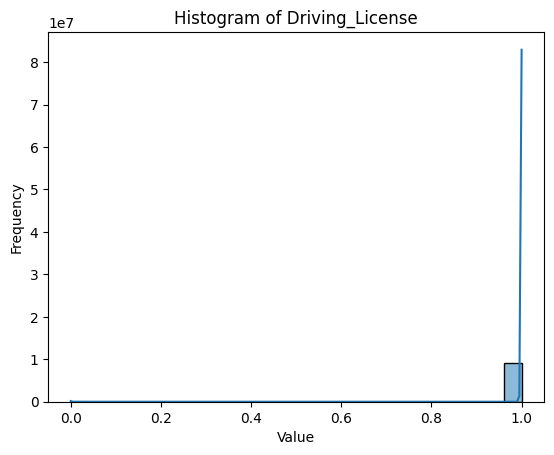

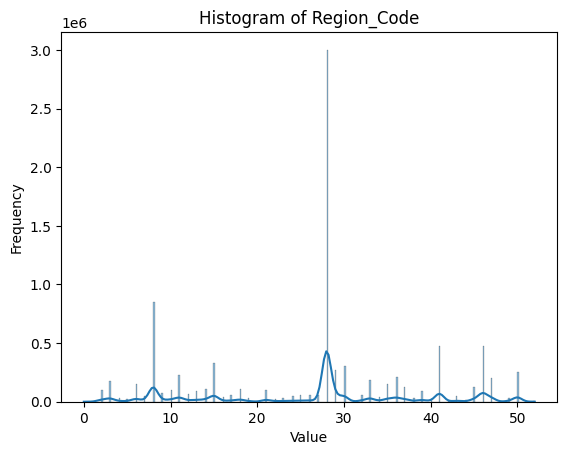

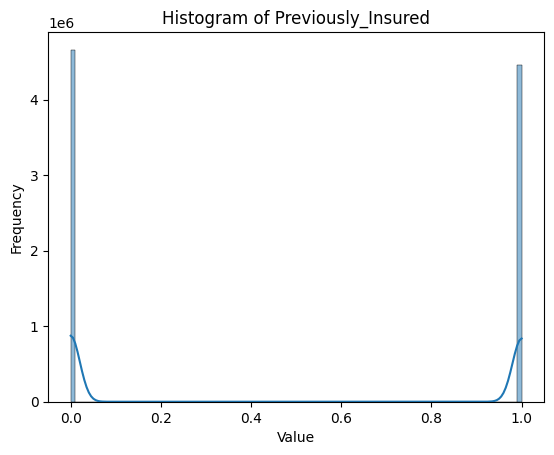

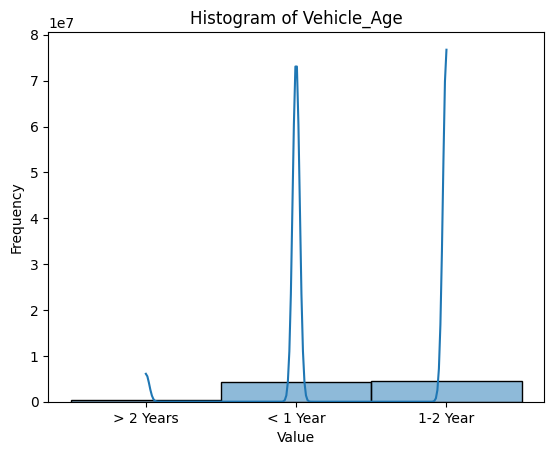

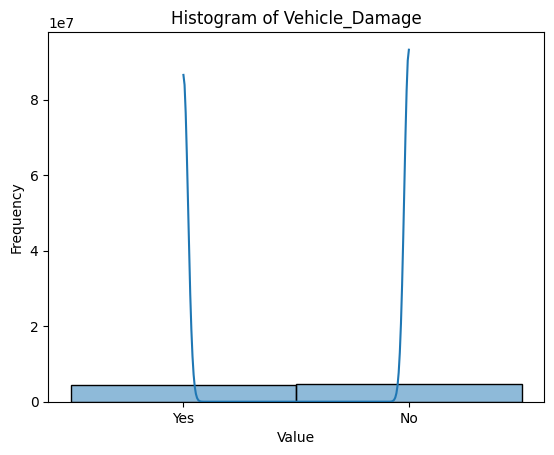

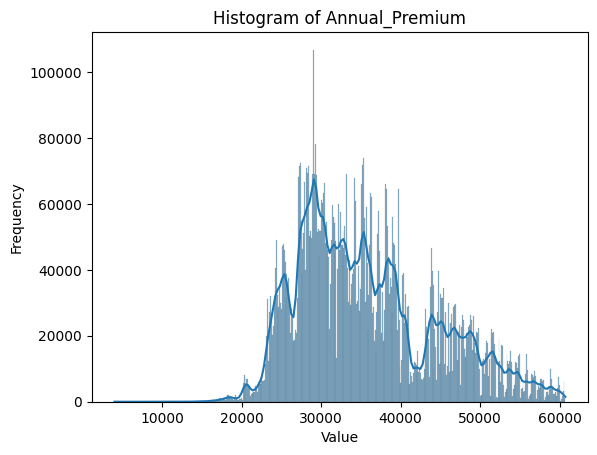

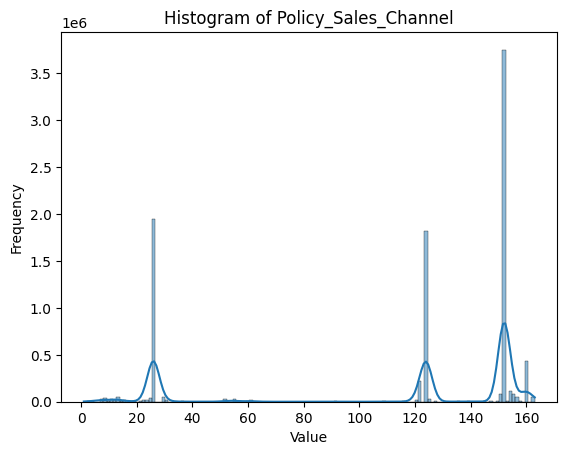

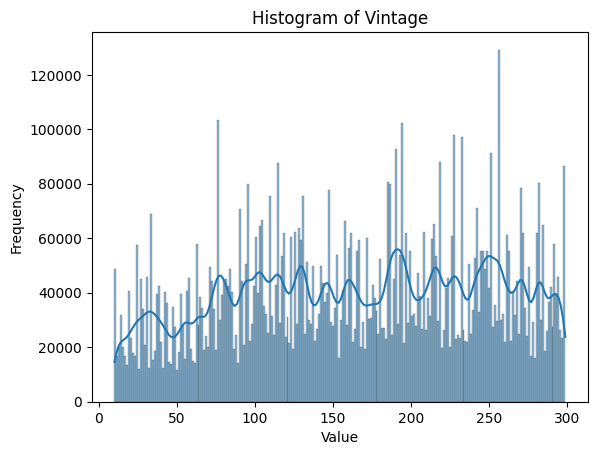

In [ ]:
for col in df.columns:
    sns.histplot(df[col], kde=True)
    plt.title(f'Histogram of {col}')
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.show()

In [15]:
print(df['Vehicle_Age'].unique())

# Strip leading/trailing spaces and convert to lower case
df['Vehicle_Age'] = df['Vehicle_Age'].str.strip()

# Define the mapping dictionary
vehicle_Age = {
    '< 1 Year': 0,
    '1-2 Year': 1,
    '> 2 Years': 2,
}

# Map the values
df['Vehicle_Age'] = df['Vehicle_Age'].map(vehicle_Age)

['1-2 Year' '> 2 Years' '< 1 Year']


In [16]:
df

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,Male,21,1,35,0,1,Yes,2630,124,187,0
1,Male,43,1,28,0,2,Yes,58911,26,288,1
2,Female,25,1,14,1,0,No,38043,152,254,0
3,Female,35,1,1,0,1,Yes,2630,156,76,0
4,Female,36,1,15,1,1,No,31951,152,294,0
...,...,...,...,...,...,...,...,...,...,...,...
11504793,Male,48,1,6,0,1,Yes,27412,26,218,0
11504794,Female,26,1,36,0,0,Yes,29509,152,115,1
11504795,Female,29,1,32,1,0,No,2630,152,189,0
11504796,Female,51,1,28,0,1,Yes,48443,26,274,1


In [17]:
binary_columns = [col for col in df.columns if set(df[col].unique()) <= {0, 1,2}]
print("Binary columns:", binary_columns)

Binary columns: ['Driving_License', 'Previously_Insured', 'Vehicle_Age', 'Response']


In [18]:
object_columns = df.select_dtypes(include=['object']).columns
print("Object columns:", object_columns)

Object columns: Index(['Gender', 'Vehicle_Damage'], dtype='object')


In [19]:
df_without_gender = df.drop(columns=['Gender','Vehicle_Damage'])
df_without_gender.corr()

,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Annual_Premium,Policy_Sales_Channel,Vintage,Response
Age,1.000000,-0.078519,0.037041,-0.276248,0.779041,0.019615,-0.591443,-0.013293,0.122134
Driving_License,-0.078519,1.000000,-0.001329,0.013733,-0.036511,-0.003506,0.042941,-0.000697,0.009197
Region_Code,0.037041,-0.001329,1.000000,-0.022367,0.039242,0.010460,-0.037606,-0.005537,0.012816
Previously_Insured,-0.276248,0.013733,-0.022367,1.000000,-0.396752,0.020818,0.236838,0.019431,-0.345930
Vehicle_Age,0.779041,-0.036511,0.039242,-0.396752,1.000000,-0.004605,-0.558992,-0.018022,0.231029
Annual_Premium,0.019615,-0.003506,0.010460,0.020818,-0.004605,1.000000,-0.096592,0.002697,0.024152
Policy_Sales_Channel,-0.591443,0.042941,-0.037606,0.236838,-0.558992,-0.096592,1.000000,0.008999,-0.152733
Vintage,-0.013293,-0.000697,-0.005537,0.019431,-0.018022,0.002697,0.008999,1.000000,-0.015177
Response,0.122134,0.009197,0.012816,-0.345930,0.231029,0.024152,-0.152733,-0.015177,1.000000


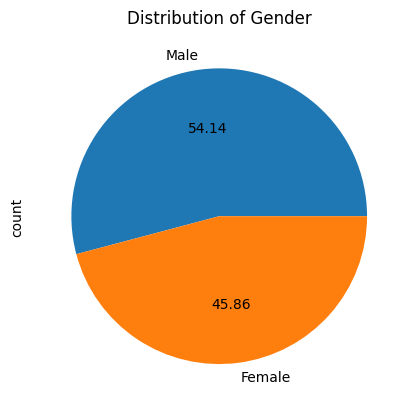

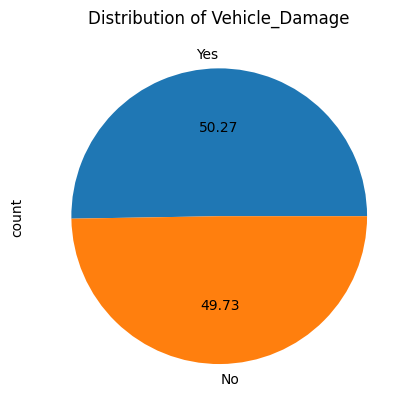

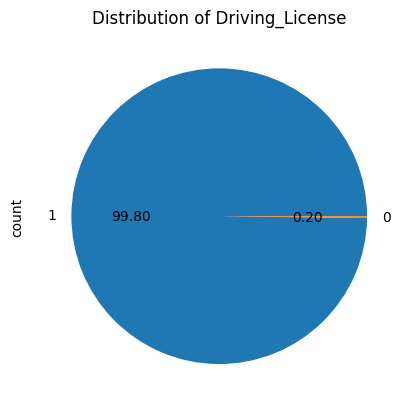

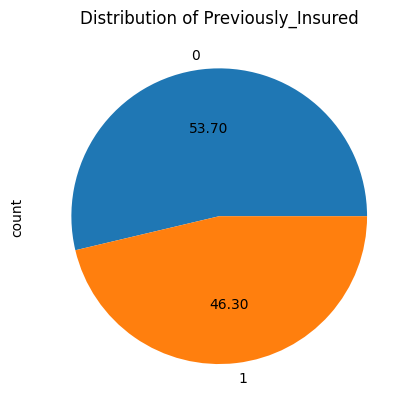

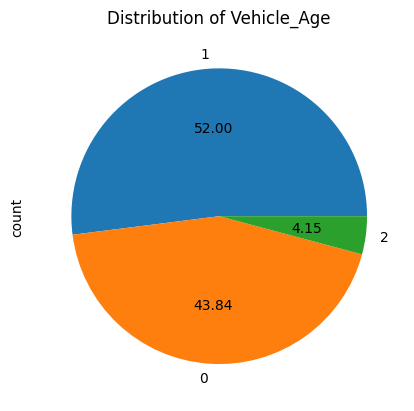

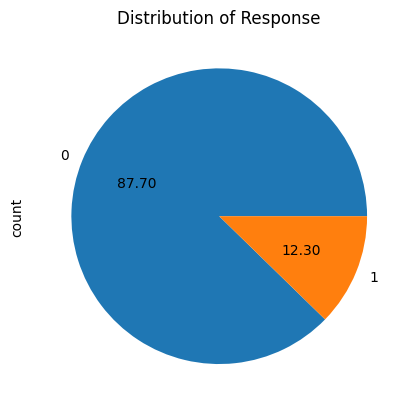

In [94]:
for i in object_columns:
    df[i].value_counts().plot(kind='pie', autopct='%.2f')
    plt.title((f'Distribution of {i}'))
    plt.show()
for i in binary_columns:
    df[i].value_counts().plot(kind='pie', autopct='%.2f')
    plt.title((f'Distribution of {i}'))
    plt.show()

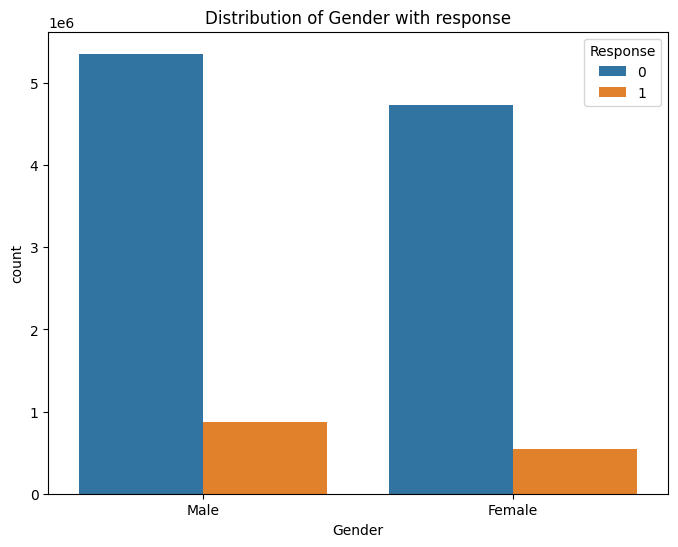

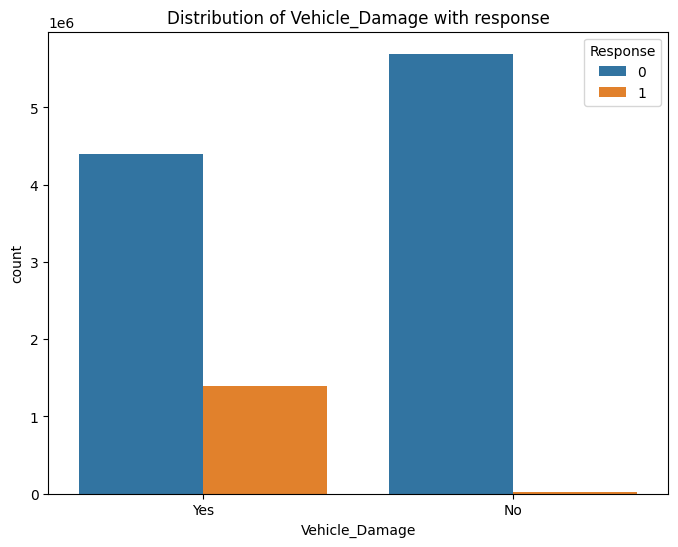

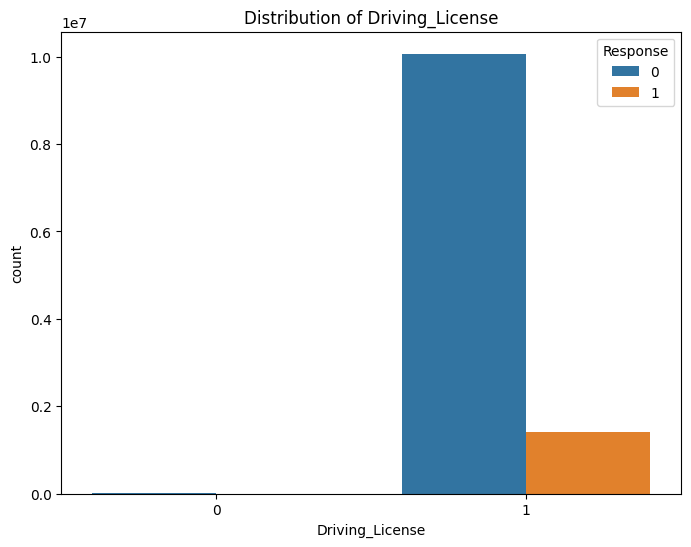

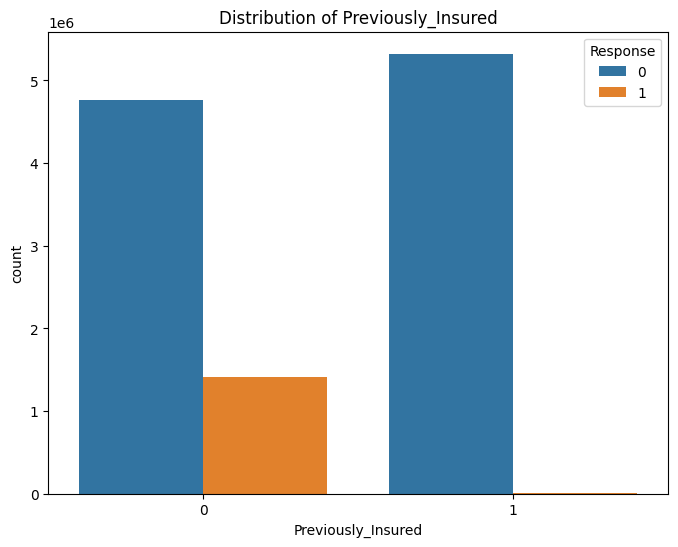

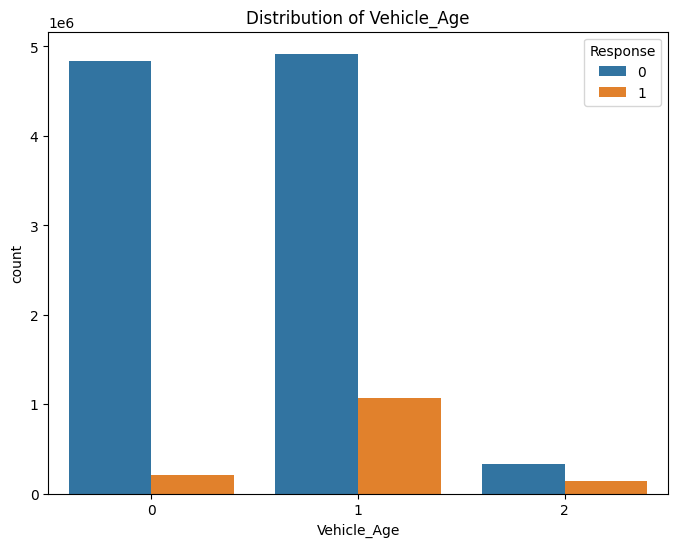

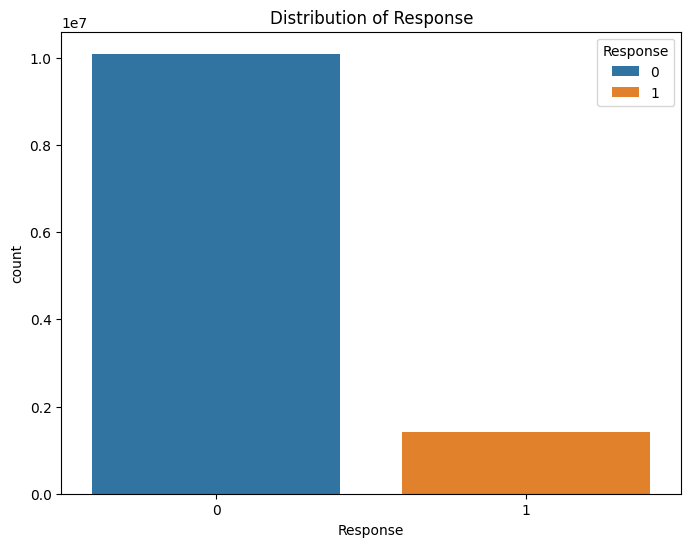

In [104]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have defined object_columns and binary_columns lists beforehand

# Plot count plots for object columns
for i in object_columns:
    plt.figure(figsize=(8, 6))  # Adjust figure size as needed
    sns.countplot(data=df, x=i, hue='Response')
    plt.title(f'Distribution of {i} with response')
    plt.show()

# Plot count plots for binary columns
for i in binary_columns:
    plt.figure(figsize=(8, 6))  # Adjust figure size as needed
    sns.countplot(data=df, x=i,hue='Response')
    plt.title(f'Distribution of {i}')
    plt.show()


In [17]:
# profile = ProfileReport(df, title="data",explorative=True,dark_mode=True)
# profile.to_file("data.html")

In [20]:
pd.crosstab(df['Response'],df['Driving_License'],normalize = 'columns')*100

Driving_License,0,1
Response,,
0,94.485213,87.686823
1,5.514787,12.313177


In [21]:
pd.crosstab(df['Response'],df['Driving_License'])

Driving_License,0,1
Response,,
0,21502,10068237
1,1255,1413804


In [22]:
df.groupby('Driving_License')['Vehicle_Damage'].value_counts(normalize=True).to_frame()

proportion
Driving_License Vehicle_Damage            
0               Yes               0.677462
                No                0.322538
1               Yes               0.502333
                No                0.497667

In [24]:
pd.crosstab(df['Response'],df['Gender'],normalize = 'columns')*100

Gender,Female,Male
Response,,
0,89.670349,86.031161
1,10.329651,13.968839


In [25]:
pd.crosstab(df['Response'],df['Vehicle_Damage'],normalize = 'columns')*100

Vehicle_Damage,No,Yes
Response,,
0,99.580168,75.947036
1,0.419832,24.052964


In [29]:
# contingency_table = pd.crosstab(df['Vehicle_Damage'], df['Response'])
# chi2, p, dof, expected = chi2_contingency(contingency_table)
# print("Chi2:", chi2)
# print("P-value:", p)
# print("Degrees of Freedom:", dof)
# print("Expected Frequencies Table:")
# print(expected)
# print('')
# print('')
# contingency_table = pd.crosstab(df['Gender'], df['Response'])
# chi2, p, dof, expected = chi2_contingency(contingency_table)
# print("Chi2:", chi2)
# print("P-value:", p)
# print("Degrees of Freedom:", dof)
# print("Expected Frequencies Table:")

Chi2: 1489196.3454699982
P-value: 0.0
Degrees of Freedom: 1
Expected Frequencies Table:
[[5017831.50651502  703737.49348498]
 [5071907.49348498  711321.50651502]]


Chi2: 35070.87159196822
P-value: 0.0
Degrees of Freedom: 1
Expected Frequencies Table:


In [22]:
# taken_license = df[df['Response'] == 1]['Driving_License']
# not_taken_license = df[df['Response'] == 0]['Driving_License']
# sns.kdeplot(taken_license, label='taken')
# sns.kdeplot(not_taken_license, label='not taken')
# plt.legend()
# plt.show()

In [29]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
X_train = df.drop('Response',axis = 1)
y_train = df['Response']
transformer = ColumnTransformer(transformers = [
    ('tnf1', OneHotEncoder(sparse_output = False,drop = 'first'),['Gender','Vehicle_Damage'])
],remainder = 'passthrough')
X_train = transformer.fit_transform(X_train)
y_train = np.array(y_train)
X_train.shape

(11504798, 10)

In [32]:
# import numpy as np
# import pandas as pd
# import seaborn as sns
# import matplotlib.pyplot as plt

# def correlation_heatmap(df):
#     numeric_df = df.select_dtypes(include=['int64', 'float64'])
#     corr_matrix = numeric_df.corr()
#     plt.figure(figsize=(12, 10))
#     sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
#     plt.title("Correlation Heatmap")
#     plt.tight_layout()
#     plt.show()
# correlation_heatmap(X_train)


In [23]:
df

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,Male,21,1,35,0,1,Yes,65101,124,187,0
1,Male,43,1,28,0,2,Yes,58911,26,288,1
2,Female,25,1,14,1,0,No,38043,152,254,0
3,Female,35,1,1,0,1,Yes,2630,156,76,0
4,Female,36,1,15,1,1,No,31951,152,294,0
...,...,...,...,...,...,...,...,...,...,...,...
11504793,Male,48,1,6,0,1,Yes,27412,26,218,0
11504794,Female,26,1,36,0,0,Yes,29509,152,115,1
11504795,Female,29,1,32,1,0,No,2630,152,189,0
11504796,Female,51,1,28,0,1,Yes,48443,26,274,1


In [24]:

bag = BaggingClassifier(
    estimator=DecisionTreeClassifier(),
    n_estimators=100,
    max_samples=0.25,
    bootstrap=True,
    random_state=42
)
bag.fit(X_train,y_train)

BaggingClassifier(estimator=DecisionTreeClassifier(), max_samples=0.25,
                  n_estimators=100, random_state=42)

In [65]:
df1 = pd.read_csv('test.csv')

In [66]:
col = df1['id']
df1 = df1.drop('id', axis = 1)
df1['Region_Code'] = df1['Region_Code'].astype(int)
df1['Policy_Sales_Channel'] = df1['Policy_Sales_Channel'].astype(int)
df1['Annual_Premium'] = df1['Annual_Premium'].astype(int)
print(df1['Vehicle_Age'].unique())

# Strip leading/trailing spaces and convert to lower case
df1['Vehicle_Age'] = df1['Vehicle_Age'].str.strip()

# Define the mapping dictionary
vehicle_Age = {
    '< 1 Year': 0,
    '1-2 Year': 1,
    '> 2 Years': 2,
}

# Map the values
df1['Vehicle_Age'] = df1['Vehicle_Age'].map(vehicle_Age)
transformer = ColumnTransformer(transformers = [
    ('tnf1', OneHotEncoder(sparse_output = False,drop = 'first'),['Gender','Vehicle_Damage'])
],remainder = 'passthrough')

X_test = transformer.fit_transform(df1)
y_pred = bag.predict(X_test)
y_pred_probs = bag.predict_proba(X_test)[:, 1]

['< 1 Year' '1-2 Year' '> 2 Years']


In [68]:
import pandas as pd
df2 = pd.DataFrame(col)
df3 = pd.DataFrame(y_pred_probs)
df_vertical = pd.concat([df2, df3], axis=1)
df_vertical.to_csv('df_vertical.csv', index=False)

In [69]:
df4 = pd.read_csv('report.csv')